In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('F:\Personal\AI_DS_ML\DATASETS\Student_Performance.csv')

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df = df.replace({'Extracurricular Activities':{'Yes':1,'No':0}})

In [8]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


This dataset contains 10000 rows and 6 columns. Description of the columns is based on kaggle.com.

Hours Studied - it's total hours spent on studying
Previous Scores - the scores obtained by a student in previous tests
Extracurricular Activities - whether the student participates in extracurricular activities or not
Sleep Hours - average number of sleeping hours per day
Sample Question Papers Practiced - the number of sample question papers the student practiced

Performance Index - A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The first five features are treated as independent variables (explanatory variables) and the Performance Index as a target. Every feature is quantitative, apart from Extracurricular Activities which was expressed in categorical manner - Yes or No. We changed this into 1's and 0's.

Let's check if the data has missing values and duplicates

In [9]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
df.duplicated().sum()

127

There are no missing values in the dataset, but there are 127 duplicates. The question here is: should we really drop duplicates? To wisely answer this question, let's take a look at the the basic statistics of each feature in the dataset.

In [11]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


The variables have very limited range. Sleep Hours varies from 4 to 9, Sample Question Papers Practiced values are between 0 and 9, Extracurricular Activities has only two possible values. It means, that in a dataset containing 10000 rows, there is a probability, that sometimes two people will have exactly the same characteristics. So even if some of those duplicated values may be done by mistake, saving them would be more beneficial for understanding the data distribution.

The mean-student learnt 5 hours, had 70% scores in previous exams, typically sleeps 6 and half an hour, solved 4 or 5 papers before, and finally got the final result of 55%. About a half of students participate in extracurricular activities. The minimal time spent on learning is 1 hour. The minimal sleeping time is 4 hours. The sleeping time has the lowest standard deviation, so the sleep duration of a specific student doesn't vary much from the mean value. The overall Performance Index is characterized by bigger variation than the score of previous exam. It can indicate the possible case, that the students who get poor results, previously got even poorer. Conversely, the people who get satisfactory results, got even better scores in the past.

# Model Buildig

In [17]:
x = df.drop('Performance Index',axis=1)
y = df['Performance Index']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

1. Simple Linear Regression
In the first model, we will make Simple Linear Regression using only Previous Scores variable to predict Performance Index.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

# Cross-validation


Cross-validation is a technique to assess a model's performance by splitting the dataset into multiple subsets (folds)training the model on a combination of these subsets, and testing it on the remaining fold.It helps estimate how well a model generalizes to unseen data aids in selecting a optimal hyperparameters improving the reliability of linear regression predictions

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
#Perfrom Cross Validation
cv_pred = lr.predict(x_test)

In [32]:
cv_mse = mean_squared_error(y_test, cv_pred)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 4.0268


In [40]:
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, cv_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9885


In [33]:
#Creating dataframe for actual and predicted values
df = pd.DataFrame({
    'Actual Values':y_test.values,
    'Predicted Values':cv_pred
})

In [34]:
df

,Actual Values,Predicted Values
0,53.0,50.475958
1,50.0,53.113849
2,80.0,78.256112
3,24.0,25.381608
4,64.0,67.410472
...,...,...
995,56.0,56.366674
996,24.0,22.895319
997,62.0,59.845676
998,57.0,59.564738


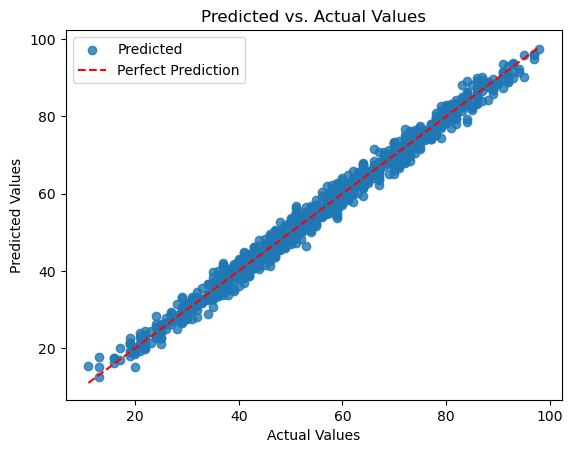

In [36]:
plt.scatter(y_test,cv_pred,alpha=0.8,label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()
